In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import pymc as pm
import pymc.sampling_jax
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
mu = 175
sigma = 7
n = 30
n_samples = 1000

samples = np.stack([np.random.normal(loc=mu, scale=sigma, size=n) for i in range(n_samples)])
samples.shape

(1000, 30)

In [4]:
print(*samples[1, :])

184.34502239794278 191.69480037088286 167.5769329387842 172.30663057188843 176.6201094034074 170.46869096821814 175.0523160382414 173.76903821879355 173.19735105327328 172.72585977745172 192.2165295243779 178.7849834645671 171.5841337451283 182.20482689097383 184.09221348190542 173.92745494700478 158.04989340883947 179.3248701349616 170.20929473771213 173.89496650961982 174.7259627681836 173.92717820987906 169.82259472386374 169.06062331106816 179.72355530336915 193.06307696284273 168.3237520145669 171.7309222132126 174.21634007177715 177.68513105399055


In [5]:
xbar = samples.mean(axis=1)
print(*xbar[0:10])

176.25804656818764 175.8108351738909 174.74246136086074 174.80181036356737 175.11385634922377 174.74367820644468 176.07551309952706 177.35992801765312 174.9360742266671 176.10053641424338


In [6]:
alpha = 0.05
t = st.t.ppf(1 - alpha/2, n-1)
t

2.045229642132703

In [7]:
interval_width = t * samples.std(axis=1, ddof=1) / np.sqrt(n)
CI_low = samples.mean(axis=1) - interval_width
CI_high = samples.mean(axis=1) + interval_width

In [8]:
coverage_p = np.sum(np.logical_and(CI_low < mu, mu < CI_high)) / samples.shape[0]
coverage_p

0.951

In [9]:
sample_size = 20
mu = 50
sigma = 10
sample_data = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample_data)

[46.30532228 45.48402855 48.68493831 51.5379984  33.89490717 50.35373156
 71.40766897 56.19002624 38.01757433 65.62296794 51.37380884 41.6738839
 48.53222422 50.40454422 43.51195477 57.41209964 65.04296066 54.52062959
 54.97318659 50.24981253 55.06543823 54.90003401 48.56026314 45.13842337
 44.16744517 37.26347084 58.72060496 43.66161627 50.0786311  44.64282898]


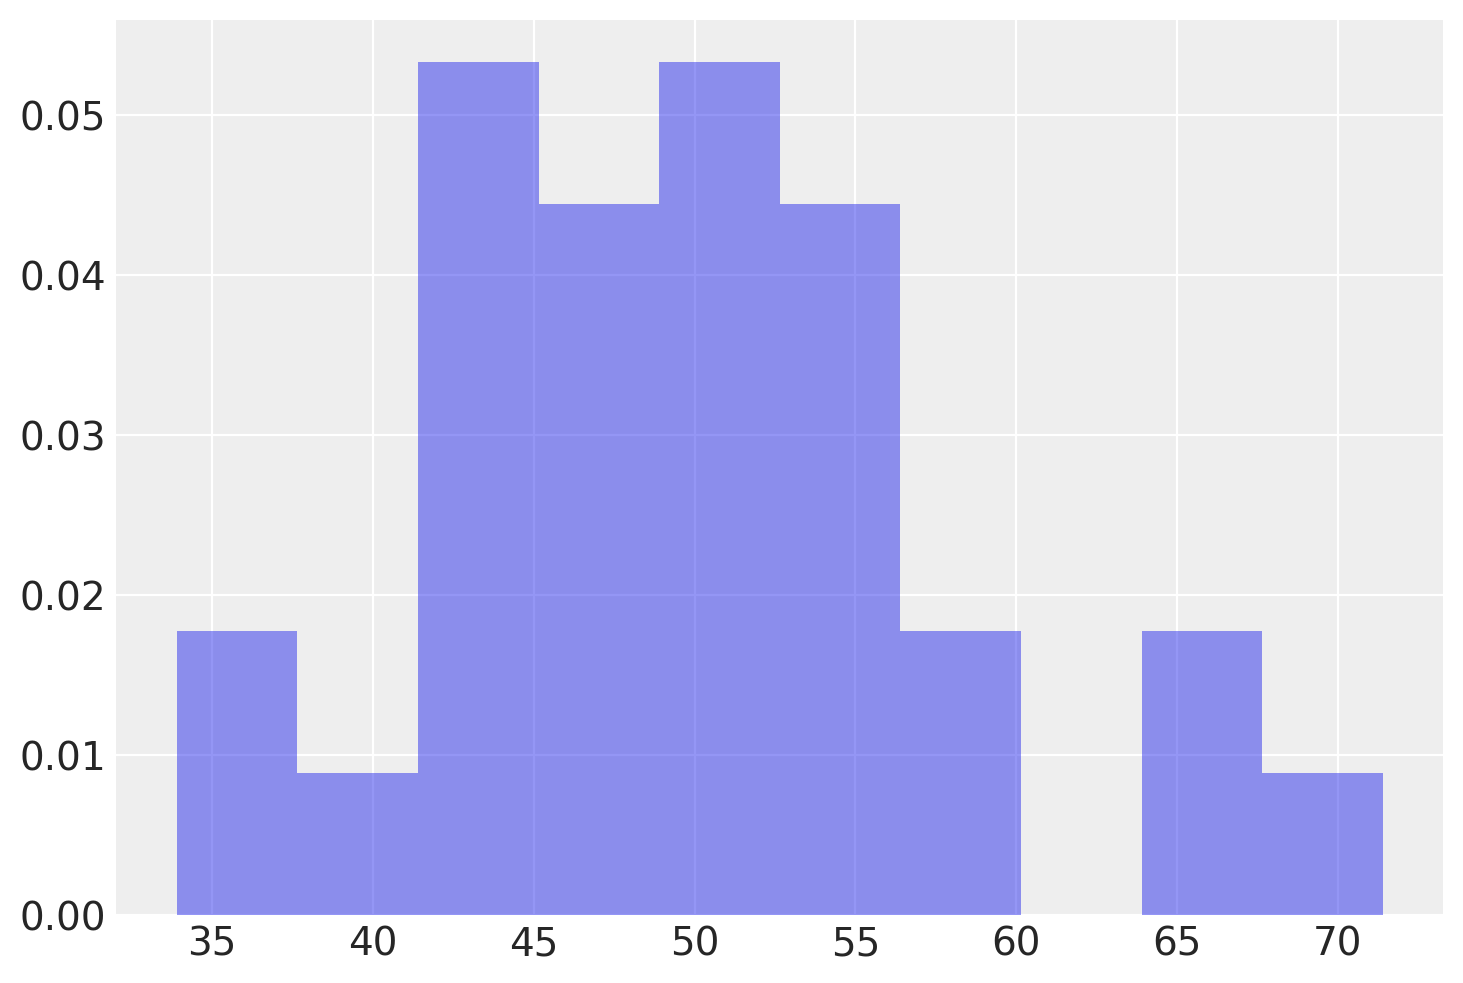

In [10]:
plt.hist(sample_data, density=True, alpha=0.5)
plt.show()

In [11]:
sample_mean = np.mean(sample_data)
sample_mean

50.24643415910673

In [12]:
sample_stddev = np.std(sample_data, ddof=1)
sample_stddev

8.384522947748104

In [13]:
standard_error = sample_stddev / np.sqrt(sample_size)
print(standard_error)

1.8748363270071677


In [14]:
degrees_of_freedom = sample_size - 1
t_val = st.t.ppf(0.975, degrees_of_freedom)
print(t_val)

2.093024054408263


In [15]:
margin_of_error = t_val * standard_error
print(margin_of_error)

3.924077530504438


In [16]:
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = [confidence_interval_lower, confidence_interval_upper]
print(confidence_interval)

[46.322356628602286, 54.17051168961117]


In [17]:
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], color='g', linewidth=2)
    plt.axvline(x=interval[1], color='g', linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])

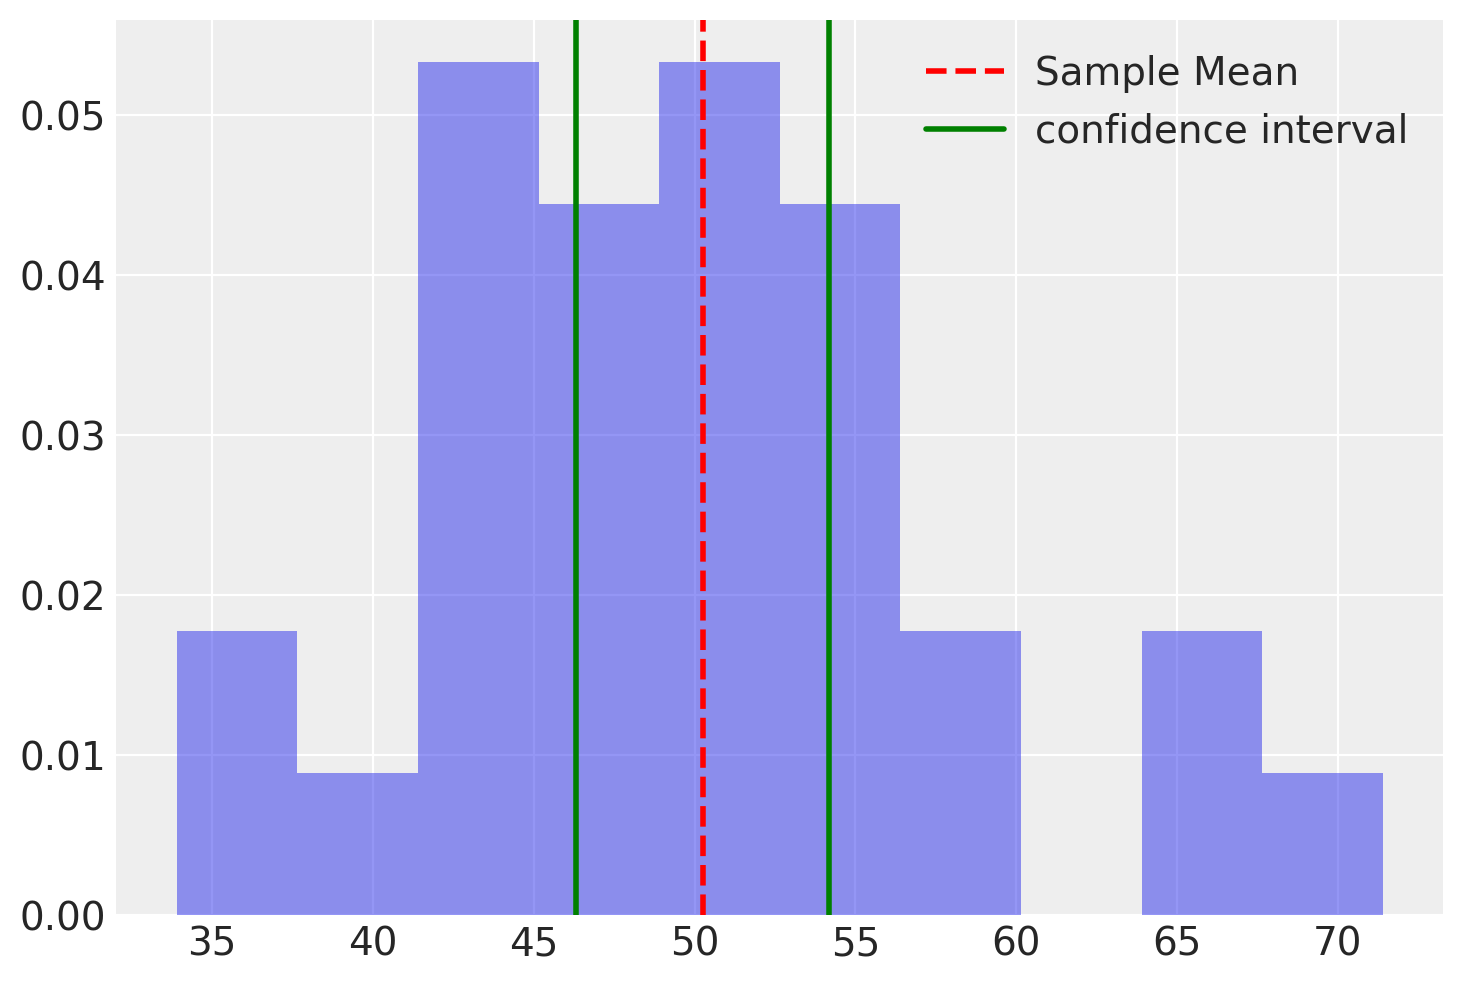

In [18]:
visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')

In [19]:
model = pm.Model()

with model:
    mu = pm.Normal("mu", mu=0, sigma=200)
    sigma = pm.HalfNormal("sigma", 100)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=sample_data)

In [20]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts()

Compiling...


Compilation time = 0:00:01.255776


Sampling...


  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                          | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                            | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                         | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1342.15it/s]


Running chain 1: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1342.95it/s]


Running chain 2: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1343.94it/s]


Running chain 3: 100%|████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1345.10it/s]


Sampling time = 0:00:01.800950


Transforming variables...


Transformation time = 0:00:00.062363


In [21]:
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,50.28,1.59,47.15,53.30,0.03,0.02,3220.18,2628.99,1.0
sigma,8.79,1.24,6.42,11.19,0.02,0.02,2638.29,1949.99,1.0


In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Wed Dec 13 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.1

matplotlib: 3.8.2
pymc      : 5.10.1
pandas    : 2.1.4
arviz     : 0.16.1
scipy     : 1.11.4
numpy     : 1.26.2

Watermark: 2.4.3

